In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
df2 = pd.read_csv('c19.csv')
print(df2.head())
print(df2.shape)


df2['Date'] = pd.to_datetime(df2['Date']).dt.date
df2['HCC'] = df2['HospitalisedCovidCases'].fillna(0)
prev_num = 0
df2['new_HCC'] = df2['HCC']
for index,row in df2.iterrows():
    df2.at[index, 'new_HCC'] = row['HCC'] - prev_num
    prev_num = row['HCC']
plt.plot(df2['Date'], df2['new_HCC'])


               X             Y                    Date  ConfirmedCovidCases  \
0 -856335.869598  7.036492e+06  2020/02/29 00:00:00+00                    1   
1 -856335.869598  7.036492e+06  2020/03/03 00:00:00+00                    1   
2 -856335.869598  7.036492e+06  2020/03/04 00:00:00+00                    4   
3 -856335.869598  7.036492e+06  2020/03/05 00:00:00+00                    7   
4 -856335.869598  7.036492e+06  2020/03/06 00:00:00+00                    5   

   TotalConfirmedCovidCases  ConfirmedCovidDeaths  TotalCovidDeaths  \
0                         1                   0.0                 0   
1                         2                   0.0                 0   
2                         6                   0.0                 0   
3                        13                   0.0                 0   
4                        18                   0.0                 0   

    StatisticsProfileDate  CovidCasesConfirmed  HospitalisedCovidCases  ...  \
0  2020/02/27 00:00

Start:  2020-09-18 00:00:00
End:  2021-11-30 00:00:00
Tfull:  [1600387200000000000 1600473600000000000 1600560000000000000
 1600646400000000000 1600732800000000000 1600819200000000000
 1600905600000000000 1600992000000000000 1601078400000000000
 1601164800000000000 1601251200000000000 1601337600000000000
 1601424000000000000 1601510400000000000 1601596800000000000
 1601683200000000000 1601769600000000000 1601856000000000000
 1601942400000000000 1602028800000000000 1602115200000000000
 1602201600000000000 1602288000000000000 1602374400000000000
 1602460800000000000 1602547200000000000 1602633600000000000
 1602720000000000000 1602806400000000000 1602892800000000000
 1602979200000000000 1603065600000000000 1603152000000000000
 1603238400000000000 1603324800000000000 1603411200000000000
 1603497600000000000 1603584000000000000 1603670400000000000
 1603756800000000000 1603843200000000000 1603929600000000000
 1604016000000000000 1604102400000000000 1604188800000000000
 1604275200000000000 16

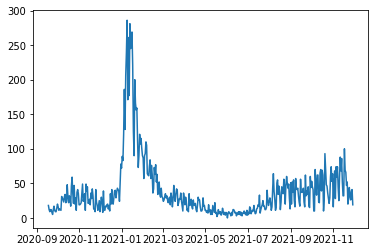

In [3]:
start=pd.to_datetime(df2['Date'][200])
print("Start: ", start)
end=pd.to_datetime(df2['Date'][638])
print("End: ", end)
t_full=pd.array(pd.DatetimeIndex(df2.iloc[200:638,2])).astype(np.int64)
print("Tfull: ", t_full)
dt = t_full[2] - t_full[1] 
print("Data sampling interval", dt)

t = (t_full[33]-t_full[32])/60/60/24
print(t)
ss = pd.array(pd.Index(df2.iloc[200:638,42])).astype(np.int64)
og_ss = ss
print(og_ss.size)
plt.plot(df2.iloc[200:638, 2], ss)
plt.show()

stride = 1
lag = 2 #determines the feature vector size
dd = 1 #number of samples in a day 
q = 1
XX = og_ss[0:og_ss.size - q - lag * dd:stride]
for i in range(1,lag): 
    X = og_ss[i*dd:og_ss.size - q - (lag-i)*dd:stride]
    XX = np.column_stack((XX,X))
  # print(XX.size) #will be size = lag * X_size
yy = og_ss[lag*dd+q::stride] #size of XX before column stacking
# print("SS:",ss.size)
# print("yy:",yy.size)
tt = t_full[lag*dd+q::stride]
  # print(tt.size)
from sklearn.model_selection import train_test_split 
X_train, y_train = XX[:250], yy[:250]
X_valid, y_valid = XX[250:350], yy[250:350]
X_test, y_test = XX[350:], yy[350:]

In [4]:
import keras
y_pred = X_valid[:,-1]
np.mean(keras.losses.mean_squared_error(y_valid, y_pred))

218.0

In [15]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape=[2,1]), keras.layers.Dense(1, activation='relu')])
model.compile(loss="mean_squared_error", optimizer="adam")
fitting = model.fit(X_train, y_train, epochs=2000, validation_data=(X_valid, y_valid))
mse = model.evaluate(X_test, y_test)

Epoch 1/2000
8/8 [==============================] - 0s 13ms/step - loss: 3779.6714 - val_loss: 589.5427
Epoch 2/2000
8/8 [==============================] - 0s 5ms/step - loss: 3670.2954 - val_loss: 576.0192
Epoch 3/2000
8/8 [==============================] - 0s 5ms/step - loss: 3567.4573 - val_loss: 562.8740
Epoch 4/2000
8/8 [==============================] - 0s 5ms/step - loss: 3458.7695 - val_loss: 550.4475
Epoch 5/2000
8/8 [==============================] - 0s 4ms/step - loss: 3367.7717 - val_loss: 537.3553
Epoch 6/2000
8/8 [==============================] - 0s 4ms/step - loss: 3260.4727 - val_loss: 525.2619
Epoch 7/2000
8/8 [==============================] - 0s 4ms/step - loss: 3168.6694 - val_loss: 513.2737
Epoch 8/2000
8/8 [==============================] - 0s 5ms/step - loss: 3079.5493 - val_loss: 501.5912
Epoch 9/2000
8/8 [==============================] - 0s 5ms/step - loss: 2992.9905 - val_loss: 490.2711
Epoch 10/2000
8/8 [==============================] - 0s 5ms/step - loss:

8/8 [==============================] - 0s 5ms/step - loss: 722.9418 - val_loss: 203.7040
Epoch 81/2000
8/8 [==============================] - 0s 4ms/step - loss: 719.7905 - val_loss: 203.0472
Epoch 82/2000
8/8 [==============================] - 0s 4ms/step - loss: 714.9320 - val_loss: 202.5191
Epoch 83/2000
8/8 [==============================] - 0s 5ms/step - loss: 712.2198 - val_loss: 201.9488
Epoch 84/2000
8/8 [==============================] - 0s 5ms/step - loss: 707.5761 - val_loss: 201.5234
Epoch 85/2000
8/8 [==============================] - 0s 4ms/step - loss: 705.1827 - val_loss: 201.0600
Epoch 86/2000
8/8 [==============================] - 0s 4ms/step - loss: 701.5754 - val_loss: 200.7101
Epoch 87/2000
8/8 [==============================] - 0s 5ms/step - loss: 699.2289 - val_loss: 200.3382
Epoch 88/2000
8/8 [==============================] - 0s 4ms/step - loss: 696.6041 - val_loss: 199.9959
Epoch 89/2000
8/8 [==============================] - 0s 5ms/step - loss: 695.5406 - val

8/8 [==============================] - 0s 5ms/step - loss: 649.6010 - val_loss: 191.8491
Epoch 160/2000
8/8 [==============================] - 0s 5ms/step - loss: 649.2841 - val_loss: 191.8115
Epoch 161/2000
8/8 [==============================] - 0s 5ms/step - loss: 649.2155 - val_loss: 191.7573
Epoch 162/2000
8/8 [==============================] - 0s 5ms/step - loss: 648.8885 - val_loss: 191.7116
Epoch 163/2000
8/8 [==============================] - 0s 5ms/step - loss: 649.3207 - val_loss: 191.6812
Epoch 164/2000
8/8 [==============================] - 0s 5ms/step - loss: 648.3963 - val_loss: 191.6389
Epoch 165/2000
8/8 [==============================] - 0s 5ms/step - loss: 648.3923 - val_loss: 191.5703
Epoch 166/2000
8/8 [==============================] - 0s 5ms/step - loss: 647.9918 - val_loss: 191.5269
Epoch 167/2000
8/8 [==============================] - 0s 5ms/step - loss: 647.8124 - val_loss: 191.4966
Epoch 168/2000
8/8 [==============================] - 0s 5ms/step - loss: 647.6

Epoch 238/2000
8/8 [==============================] - 0s 5ms/step - loss: 631.6629 - val_loss: 188.1940
Epoch 239/2000
8/8 [==============================] - 0s 6ms/step - loss: 631.4131 - val_loss: 188.1490
Epoch 240/2000
8/8 [==============================] - 0s 5ms/step - loss: 631.1556 - val_loss: 188.1193
Epoch 241/2000
8/8 [==============================] - 0s 5ms/step - loss: 630.9282 - val_loss: 188.0837
Epoch 242/2000
8/8 [==============================] - 0s 5ms/step - loss: 630.8348 - val_loss: 188.0644
Epoch 243/2000
8/8 [==============================] - 0s 6ms/step - loss: 631.0320 - val_loss: 187.9823
Epoch 244/2000
8/8 [==============================] - 0s 5ms/step - loss: 630.4078 - val_loss: 187.9536
Epoch 245/2000
8/8 [==============================] - 0s 5ms/step - loss: 629.9987 - val_loss: 187.9106
Epoch 246/2000
8/8 [==============================] - 0s 5ms/step - loss: 629.9509 - val_loss: 187.8528
Epoch 247/2000
8/8 [==============================] - 0s 5ms/ste

Epoch 317/2000
8/8 [==============================] - 0s 5ms/step - loss: 614.7421 - val_loss: 184.9960
Epoch 318/2000
8/8 [==============================] - 0s 6ms/step - loss: 614.8303 - val_loss: 184.9326
Epoch 319/2000
8/8 [==============================] - 0s 5ms/step - loss: 615.0770 - val_loss: 184.9675
Epoch 320/2000
8/8 [==============================] - 0s 5ms/step - loss: 614.7958 - val_loss: 184.9649
Epoch 321/2000
8/8 [==============================] - 0s 5ms/step - loss: 614.5792 - val_loss: 184.8457
Epoch 322/2000
8/8 [==============================] - 0s 5ms/step - loss: 613.7242 - val_loss: 184.7936
Epoch 323/2000
8/8 [==============================] - 0s 5ms/step - loss: 613.4532 - val_loss: 184.7601
Epoch 324/2000
8/8 [==============================] - 0s 5ms/step - loss: 613.7045 - val_loss: 184.7056
Epoch 325/2000
8/8 [==============================] - 0s 5ms/step - loss: 613.1934 - val_loss: 184.6977
Epoch 326/2000
8/8 [==============================] - 0s 6ms/ste

Epoch 396/2000
8/8 [==============================] - 0s 6ms/step - loss: 600.8646 - val_loss: 182.4624
Epoch 397/2000
8/8 [==============================] - 0s 5ms/step - loss: 600.4052 - val_loss: 182.4538
Epoch 398/2000
8/8 [==============================] - 0s 5ms/step - loss: 600.1175 - val_loss: 182.4263
Epoch 399/2000
8/8 [==============================] - 0s 5ms/step - loss: 600.0020 - val_loss: 182.4270
Epoch 400/2000
8/8 [==============================] - 0s 5ms/step - loss: 599.9454 - val_loss: 182.4043
Epoch 401/2000
8/8 [==============================] - 0s 5ms/step - loss: 599.6845 - val_loss: 182.3957
Epoch 402/2000
8/8 [==============================] - 0s 5ms/step - loss: 599.4409 - val_loss: 182.3748
Epoch 403/2000
8/8 [==============================] - 0s 5ms/step - loss: 599.6330 - val_loss: 182.3679
Epoch 404/2000
8/8 [==============================] - 0s 5ms/step - loss: 599.2172 - val_loss: 182.3304
Epoch 405/2000
8/8 [==============================] - 0s 5ms/ste

Epoch 475/2000
8/8 [==============================] - 0s 5ms/step - loss: 589.7451 - val_loss: 180.8313
Epoch 476/2000
8/8 [==============================] - 0s 6ms/step - loss: 589.3278 - val_loss: 180.7600
Epoch 477/2000
8/8 [==============================] - 0s 5ms/step - loss: 589.4185 - val_loss: 180.6958
Epoch 478/2000
8/8 [==============================] - 0s 5ms/step - loss: 589.1844 - val_loss: 180.6984
Epoch 479/2000
8/8 [==============================] - 0s 5ms/step - loss: 589.0017 - val_loss: 180.6565
Epoch 480/2000
8/8 [==============================] - 0s 5ms/step - loss: 588.8881 - val_loss: 180.6288
Epoch 481/2000
8/8 [==============================] - 0s 5ms/step - loss: 588.9666 - val_loss: 180.6465
Epoch 482/2000
8/8 [==============================] - 0s 5ms/step - loss: 588.6407 - val_loss: 180.6073
Epoch 483/2000
8/8 [==============================] - 0s 5ms/step - loss: 588.4692 - val_loss: 180.6010
Epoch 484/2000
8/8 [==============================] - 0s 5ms/ste

Epoch 554/2000
8/8 [==============================] - 0s 5ms/step - loss: 582.5784 - val_loss: 179.9288
Epoch 555/2000
8/8 [==============================] - 0s 6ms/step - loss: 582.5525 - val_loss: 179.6988
Epoch 556/2000
8/8 [==============================] - 0s 5ms/step - loss: 581.3093 - val_loss: 179.6783
Epoch 557/2000
8/8 [==============================] - 0s 6ms/step - loss: 581.1763 - val_loss: 179.6790
Epoch 558/2000
8/8 [==============================] - 0s 5ms/step - loss: 581.1326 - val_loss: 179.7162
Epoch 559/2000
8/8 [==============================] - 0s 5ms/step - loss: 581.0541 - val_loss: 179.7395
Epoch 560/2000
8/8 [==============================] - 0s 6ms/step - loss: 581.6110 - val_loss: 179.8155
Epoch 561/2000
8/8 [==============================] - 0s 5ms/step - loss: 580.7372 - val_loss: 179.7520
Epoch 562/2000
8/8 [==============================] - 0s 6ms/step - loss: 581.3220 - val_loss: 179.6433
Epoch 563/2000
8/8 [==============================] - 0s 5ms/ste

Epoch 633/2000
8/8 [==============================] - 0s 5ms/step - loss: 575.7971 - val_loss: 179.1288
Epoch 634/2000
8/8 [==============================] - 0s 5ms/step - loss: 575.6535 - val_loss: 179.1452
Epoch 635/2000
8/8 [==============================] - 0s 5ms/step - loss: 575.6242 - val_loss: 179.1729
Epoch 636/2000
8/8 [==============================] - 0s 5ms/step - loss: 575.6168 - val_loss: 179.2347
Epoch 637/2000
8/8 [==============================] - 0s 5ms/step - loss: 575.9660 - val_loss: 179.3146
Epoch 638/2000
8/8 [==============================] - 0s 5ms/step - loss: 575.9745 - val_loss: 179.3286
Epoch 639/2000
8/8 [==============================] - 0s 6ms/step - loss: 575.8638 - val_loss: 179.1400
Epoch 640/2000
8/8 [==============================] - 0s 5ms/step - loss: 575.6292 - val_loss: 179.0774
Epoch 641/2000
8/8 [==============================] - 0s 5ms/step - loss: 575.3887 - val_loss: 179.1226
Epoch 642/2000
8/8 [==============================] - 0s 6ms/ste

Epoch 712/2000
8/8 [==============================] - 0s 6ms/step - loss: 572.1139 - val_loss: 178.8545
Epoch 713/2000
8/8 [==============================] - 0s 6ms/step - loss: 571.9129 - val_loss: 178.9445
Epoch 714/2000
8/8 [==============================] - 0s 6ms/step - loss: 571.9251 - val_loss: 178.9572
Epoch 715/2000
8/8 [==============================] - 0s 6ms/step - loss: 571.8994 - val_loss: 179.0346
Epoch 716/2000
8/8 [==============================] - 0s 5ms/step - loss: 571.8721 - val_loss: 178.9794
Epoch 717/2000
8/8 [==============================] - 0s 5ms/step - loss: 571.6545 - val_loss: 178.9707
Epoch 718/2000
8/8 [==============================] - 0s 5ms/step - loss: 571.9045 - val_loss: 178.9629
Epoch 719/2000
8/8 [==============================] - 0s 5ms/step - loss: 571.6955 - val_loss: 179.0012
Epoch 720/2000
8/8 [==============================] - 0s 5ms/step - loss: 571.5745 - val_loss: 178.9634
Epoch 721/2000
8/8 [==============================] - 0s 5ms/ste

Epoch 791/2000
8/8 [==============================] - 0s 7ms/step - loss: 569.3976 - val_loss: 178.8837
Epoch 792/2000
8/8 [==============================] - 0s 5ms/step - loss: 569.2278 - val_loss: 178.8768
Epoch 793/2000
8/8 [==============================] - 0s 5ms/step - loss: 569.4579 - val_loss: 178.8487
Epoch 794/2000
8/8 [==============================] - 0s 5ms/step - loss: 569.0825 - val_loss: 178.9093
Epoch 795/2000
8/8 [==============================] - 0s 5ms/step - loss: 569.3073 - val_loss: 178.9850
Epoch 796/2000
8/8 [==============================] - 0s 5ms/step - loss: 569.7131 - val_loss: 178.8326
Epoch 797/2000
8/8 [==============================] - 0s 5ms/step - loss: 569.6146 - val_loss: 179.0018
Epoch 798/2000
8/8 [==============================] - 0s 6ms/step - loss: 569.0341 - val_loss: 178.9107
Epoch 799/2000
8/8 [==============================] - 0s 5ms/step - loss: 569.1439 - val_loss: 178.9335
Epoch 800/2000
8/8 [==============================] - 0s 6ms/ste

Epoch 870/2000
8/8 [==============================] - 0s 5ms/step - loss: 568.2438 - val_loss: 178.9598
Epoch 871/2000
8/8 [==============================] - 0s 6ms/step - loss: 567.4877 - val_loss: 178.9655
Epoch 872/2000
8/8 [==============================] - 0s 6ms/step - loss: 567.4304 - val_loss: 178.9433
Epoch 873/2000
8/8 [==============================] - 0s 6ms/step - loss: 567.6401 - val_loss: 178.8835
Epoch 874/2000
8/8 [==============================] - 0s 7ms/step - loss: 567.3795 - val_loss: 178.9006
Epoch 875/2000
8/8 [==============================] - 0s 7ms/step - loss: 567.2128 - val_loss: 178.9508
Epoch 876/2000
8/8 [==============================] - 0s 11ms/step - loss: 567.1255 - val_loss: 179.0067
Epoch 877/2000
8/8 [==============================] - 0s 10ms/step - loss: 567.2413 - val_loss: 179.0947
Epoch 878/2000
8/8 [==============================] - 0s 10ms/step - loss: 567.4698 - val_loss: 179.0178
Epoch 879/2000
8/8 [==============================] - 0s 6ms/

8/8 [==============================] - 0s 4ms/step - loss: 565.3891 - val_loss: 179.1187
Epoch 1027/2000
8/8 [==============================] - 0s 4ms/step - loss: 565.4927 - val_loss: 179.0343
Epoch 1028/2000
8/8 [==============================] - 0s 4ms/step - loss: 565.9832 - val_loss: 179.1981
Epoch 1029/2000
8/8 [==============================] - 0s 4ms/step - loss: 565.3194 - val_loss: 179.0682
Epoch 1030/2000
8/8 [==============================] - 0s 4ms/step - loss: 565.5515 - val_loss: 179.1741
Epoch 1031/2000
8/8 [==============================] - 0s 4ms/step - loss: 565.3046 - val_loss: 179.2038
Epoch 1032/2000
8/8 [==============================] - 0s 4ms/step - loss: 565.2844 - val_loss: 179.1618
Epoch 1033/2000
8/8 [==============================] - 0s 4ms/step - loss: 565.4389 - val_loss: 178.9996
Epoch 1034/2000
8/8 [==============================] - 0s 4ms/step - loss: 565.1325 - val_loss: 178.9950
Epoch 1035/2000
8/8 [==============================] - 0s 4ms/step - lo

8/8 [==============================] - 0s 4ms/step - loss: 564.1093 - val_loss: 179.2632
Epoch 1183/2000
8/8 [==============================] - 0s 4ms/step - loss: 564.7666 - val_loss: 179.5065
Epoch 1184/2000
8/8 [==============================] - 0s 4ms/step - loss: 564.3583 - val_loss: 179.3653
Epoch 1185/2000
8/8 [==============================] - 0s 4ms/step - loss: 564.0620 - val_loss: 179.3853
Epoch 1186/2000
8/8 [==============================] - 0s 4ms/step - loss: 564.4904 - val_loss: 179.5189
Epoch 1187/2000
8/8 [==============================] - 0s 4ms/step - loss: 564.1608 - val_loss: 179.3805
Epoch 1188/2000
8/8 [==============================] - 0s 4ms/step - loss: 564.1614 - val_loss: 179.4677
Epoch 1189/2000
8/8 [==============================] - 0s 4ms/step - loss: 564.2742 - val_loss: 179.5355
Epoch 1190/2000
8/8 [==============================] - 0s 4ms/step - loss: 564.1780 - val_loss: 179.4688
Epoch 1191/2000
8/8 [==============================] - 0s 4ms/step - lo

Epoch 1338/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.6432 - val_loss: 179.7308
Epoch 1339/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.5547 - val_loss: 179.7637
Epoch 1340/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.3617 - val_loss: 179.6560
Epoch 1341/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.6813 - val_loss: 179.4993
Epoch 1342/2000
8/8 [==============================] - 0s 5ms/step - loss: 564.4114 - val_loss: 179.7243
Epoch 1343/2000
8/8 [==============================] - 0s 6ms/step - loss: 563.4564 - val_loss: 179.5662
Epoch 1344/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.5294 - val_loss: 179.5329
Epoch 1345/2000
8/8 [==============================] - 0s 6ms/step - loss: 564.0168 - val_loss: 179.6012
Epoch 1346/2000
8/8 [==============================] - 0s 7ms/step - loss: 564.1332 - val_loss: 179.3512
Epoch 1347/2000
8/8 [==============================] - 

8/8 [==============================] - 0s 6ms/step - loss: 563.2140 - val_loss: 179.6954
Epoch 1417/2000
8/8 [==============================] - 0s 7ms/step - loss: 563.2809 - val_loss: 179.7347
Epoch 1418/2000
8/8 [==============================] - 0s 6ms/step - loss: 563.1954 - val_loss: 179.7377
Epoch 1419/2000
8/8 [==============================] - 0s 8ms/step - loss: 563.2836 - val_loss: 179.7807
Epoch 1420/2000
8/8 [==============================] - 0s 8ms/step - loss: 563.2293 - val_loss: 179.7533
Epoch 1421/2000
8/8 [==============================] - 0s 6ms/step - loss: 563.9318 - val_loss: 179.5142
Epoch 1422/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.7786 - val_loss: 179.7181
Epoch 1423/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.6460 - val_loss: 179.5468
Epoch 1424/2000
8/8 [==============================] - 0s 6ms/step - loss: 563.3162 - val_loss: 179.6401
Epoch 1425/2000
8/8 [==============================] - 0s 5ms/step - lo

Epoch 1494/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.1650 - val_loss: 179.9833
Epoch 1495/2000
8/8 [==============================] - 0s 6ms/step - loss: 563.6265 - val_loss: 180.0730
Epoch 1496/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.4802 - val_loss: 179.8170
Epoch 1497/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.2646 - val_loss: 179.9184
Epoch 1498/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.4659 - val_loss: 179.7176
Epoch 1499/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.1271 - val_loss: 179.6399
Epoch 1500/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.0889 - val_loss: 179.6405
Epoch 1501/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.3014 - val_loss: 179.7707
Epoch 1502/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.2789 - val_loss: 179.6789
Epoch 1503/2000
8/8 [==============================] - 

8/8 [==============================] - 0s 5ms/step - loss: 562.9408 - val_loss: 179.9651
Epoch 1573/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.4493 - val_loss: 180.1202
Epoch 1574/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.1031 - val_loss: 180.0071
Epoch 1575/2000
8/8 [==============================] - 0s 4ms/step - loss: 562.8553 - val_loss: 179.9383
Epoch 1576/2000
8/8 [==============================] - 0s 4ms/step - loss: 563.1639 - val_loss: 179.7510
Epoch 1577/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.1558 - val_loss: 179.6855
Epoch 1578/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.1874 - val_loss: 179.8080
Epoch 1579/2000
8/8 [==============================] - 0s 6ms/step - loss: 562.9487 - val_loss: 179.8033
Epoch 1580/2000
8/8 [==============================] - 0s 5ms/step - loss: 562.9818 - val_loss: 179.8771
Epoch 1581/2000
8/8 [==============================] - 0s 6ms/step - lo

Epoch 1650/2000
8/8 [==============================] - 0s 5ms/step - loss: 562.8195 - val_loss: 179.7420
Epoch 1651/2000
8/8 [==============================] - 0s 4ms/step - loss: 562.7986 - val_loss: 179.7138
Epoch 1652/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.2654 - val_loss: 179.7670
Epoch 1653/2000
8/8 [==============================] - 0s 5ms/step - loss: 562.9577 - val_loss: 179.6500
Epoch 1654/2000
8/8 [==============================] - 0s 4ms/step - loss: 562.9233 - val_loss: 179.6140
Epoch 1655/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.2199 - val_loss: 179.6690
Epoch 1656/2000
8/8 [==============================] - 0s 6ms/step - loss: 564.3479 - val_loss: 179.9691
Epoch 1657/2000
8/8 [==============================] - 0s 6ms/step - loss: 562.8936 - val_loss: 179.7851
Epoch 1658/2000
8/8 [==============================] - 0s 5ms/step - loss: 563.0323 - val_loss: 179.6943
Epoch 1659/2000
8/8 [==============================] - 

8/8 [==============================] - 0s 4ms/step - loss: 562.6703 - val_loss: 179.9942
Epoch 1729/2000
8/8 [==============================] - 0s 4ms/step - loss: 563.0323 - val_loss: 179.8486
Epoch 1730/2000
8/8 [==============================] - 0s 4ms/step - loss: 562.7405 - val_loss: 179.8748
Epoch 1731/2000
8/8 [==============================] - 0s 4ms/step - loss: 562.9039 - val_loss: 179.9899
Epoch 1732/2000
8/8 [==============================] - 0s 4ms/step - loss: 563.0539 - val_loss: 180.1124
Epoch 1733/2000
8/8 [==============================] - 0s 4ms/step - loss: 562.9681 - val_loss: 180.1118
Epoch 1734/2000
8/8 [==============================] - 0s 4ms/step - loss: 563.0131 - val_loss: 179.8386
Epoch 1735/2000
8/8 [==============================] - 0s 4ms/step - loss: 563.8648 - val_loss: 179.5694
Epoch 1736/2000
8/8 [==============================] - 0s 4ms/step - loss: 562.6503 - val_loss: 179.7440
Epoch 1737/2000
8/8 [==============================] - 0s 4ms/step - lo

8/8 [==============================] - 0s 5ms/step - loss: 562.7087 - val_loss: 179.9953
Epoch 1885/2000
8/8 [==============================] - 0s 6ms/step - loss: 562.6346 - val_loss: 180.0001
Epoch 1886/2000
8/8 [==============================] - 0s 6ms/step - loss: 563.0502 - val_loss: 179.9706
Epoch 1887/2000
8/8 [==============================] - 0s 6ms/step - loss: 562.7151 - val_loss: 180.1556
Epoch 1888/2000
8/8 [==============================] - 0s 7ms/step - loss: 563.1676 - val_loss: 180.2810
Epoch 1889/2000
8/8 [==============================] - 0s 6ms/step - loss: 562.7381 - val_loss: 180.1147
Epoch 1890/2000
8/8 [==============================] - 0s 5ms/step - loss: 562.6924 - val_loss: 180.0243
Epoch 1891/2000
8/8 [==============================] - 0s 5ms/step - loss: 562.6079 - val_loss: 180.0361
Epoch 1892/2000
8/8 [==============================] - 0s 11ms/step - loss: 562.7511 - val_loss: 180.0133
Epoch 1893/2000
8/8 [==============================] - 0s 5ms/step - l

In [7]:
model1 = keras.models.Sequential([keras.layers.SimpleRNN(1, input_shape=[None,1])])
model1.compile(loss="mean_squared_error", optimizer="adam")
fitting1 = model1.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse1 = model1.evaluate(X_valid, y_valid)

Epoch 1/20
8/8 [==============================] - 1s 27ms/step - loss: 4695.5400 - val_loss: 623.8386
Epoch 2/20
8/8 [==============================] - 0s 6ms/step - loss: 4695.5400 - val_loss: 623.8381
Epoch 3/20
8/8 [==============================] - 0s 6ms/step - loss: 4695.5400 - val_loss: 623.8377
Epoch 4/20
8/8 [==============================] - 0s 5ms/step - loss: 4695.5400 - val_loss: 623.8374
Epoch 5/20
8/8 [==============================] - 0s 6ms/step - loss: 4695.5400 - val_loss: 623.8370
Epoch 6/20
8/8 [==============================] - 0s 6ms/step - loss: 4695.5400 - val_loss: 623.8367
Epoch 7/20
8/8 [==============================] - 0s 5ms/step - loss: 4695.5400 - val_loss: 623.8363
Epoch 8/20
8/8 [==============================] - 0s 6ms/step - loss: 4695.5400 - val_loss: 623.8360
Epoch 9/20
8/8 [==============================] - 0s 6ms/step - loss: 4695.5400 - val_loss: 623.8356
Epoch 10/20
8/8 [==============================] - 0s 7ms/step - loss: 4695.5400 - val_los

In [8]:
model2 = keras.models.Sequential([keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
                                  keras.layers.SimpleRNN(20, return_sequences=True),
                                  keras.layers.SimpleRNN(1)])
model2.compile(loss="mean_squared_error", optimizer="adam")
fitting2 = model2.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
model2.evaluate(X_valid, y_valid)

Epoch 1/20
8/8 [==============================] - 2s 54ms/step - loss: 4784.4937 - val_loss: 638.4432
Epoch 2/20
8/8 [==============================] - 0s 7ms/step - loss: 4704.5532 - val_loss: 625.2823
Epoch 3/20
8/8 [==============================] - 0s 6ms/step - loss: 4696.7065 - val_loss: 624.2719
Epoch 4/20
8/8 [==============================] - 0s 6ms/step - loss: 4695.9956 - val_loss: 624.0793
Epoch 5/20
8/8 [==============================] - 0s 6ms/step - loss: 4695.8418 - val_loss: 624.0157
Epoch 6/20
8/8 [==============================] - 0s 8ms/step - loss: 4695.7876 - val_loss: 623.9879
Epoch 7/20
8/8 [==============================] - 0s 8ms/step - loss: 4695.7593 - val_loss: 623.9731
Epoch 8/20
8/8 [==============================] - 0s 7ms/step - loss: 4695.7446 - val_loss: 623.9640
Epoch 9/20
8/8 [==============================] - 0s 8ms/step - loss: 4695.7339 - val_loss: 623.9571
Epoch 10/20
8/8 [==============================] - 0s 7ms/step - loss: 4695.7261 - val_los

623.9096069335938

In [21]:
model3 = keras.models.Sequential([keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None,1]),
                                  keras.layers.SimpleRNN(20),
                                  keras.layers.Dense(1)])
model3.compile(loss="mean_squared_error", optimizer="adam")
model3.fit(X_train, y_train, epochs=2000, validation_data=(X_valid, y_valid))
model3.evaluate(X_valid, y_valid)

Epoch 1/2000
8/8 [==============================] - 1s 35ms/step - loss: 4771.6284 - val_loss: 637.4393
Epoch 2/2000
8/8 [==============================] - 0s 6ms/step - loss: 4702.7754 - val_loss: 608.3566
Epoch 3/2000
8/8 [==============================] - 0s 6ms/step - loss: 4638.7793 - val_loss: 582.8280
Epoch 4/2000
8/8 [==============================] - 0s 6ms/step - loss: 4578.2646 - val_loss: 559.2941
Epoch 5/2000
8/8 [==============================] - 0s 5ms/step - loss: 4521.9907 - val_loss: 538.2473
Epoch 6/2000
8/8 [==============================] - 0s 6ms/step - loss: 4469.9619 - val_loss: 520.4886
Epoch 7/2000
8/8 [==============================] - 0s 6ms/step - loss: 4430.9927 - val_loss: 506.1991
Epoch 8/2000
8/8 [==============================] - 0s 6ms/step - loss: 4396.7358 - val_loss: 494.9789
Epoch 9/2000
8/8 [==============================] - 0s 5ms/step - loss: 4369.1846 - val_loss: 485.5536
Epoch 10/2000
8/8 [==============================] - 0s 5ms/step - loss:

Epoch 80/2000
8/8 [==============================] - 0s 6ms/step - loss: 3579.2854 - val_loss: 276.1435
Epoch 81/2000
8/8 [==============================] - 0s 6ms/step - loss: 3571.8215 - val_loss: 275.2869
Epoch 82/2000
8/8 [==============================] - 0s 5ms/step - loss: 3564.3181 - val_loss: 274.4562
Epoch 83/2000
8/8 [==============================] - 0s 6ms/step - loss: 3556.7170 - val_loss: 273.6680
Epoch 84/2000
8/8 [==============================] - 0s 6ms/step - loss: 3549.1909 - val_loss: 272.9196
Epoch 85/2000
8/8 [==============================] - 0s 7ms/step - loss: 3541.7400 - val_loss: 272.2152
Epoch 86/2000
8/8 [==============================] - 0s 6ms/step - loss: 3534.1101 - val_loss: 271.5615
Epoch 87/2000
8/8 [==============================] - 0s 5ms/step - loss: 3526.7581 - val_loss: 270.9485
Epoch 88/2000
8/8 [==============================] - 0s 6ms/step - loss: 3519.7529 - val_loss: 270.3499
Epoch 89/2000
8/8 [==============================] - 0s 5ms/step

Epoch 236/2000
8/8 [==============================] - 0s 6ms/step - loss: 2708.9934 - val_loss: 159.0044
Epoch 237/2000
8/8 [==============================] - 0s 6ms/step - loss: 2704.0139 - val_loss: 156.8504
Epoch 238/2000
8/8 [==============================] - 0s 6ms/step - loss: 2699.4429 - val_loss: 158.2012
Epoch 239/2000
8/8 [==============================] - 0s 5ms/step - loss: 2695.4084 - val_loss: 157.9118
Epoch 240/2000
8/8 [==============================] - 0s 6ms/step - loss: 2690.5415 - val_loss: 158.4468
Epoch 241/2000
8/8 [==============================] - 0s 5ms/step - loss: 2686.6636 - val_loss: 158.3605
Epoch 242/2000
8/8 [==============================] - 0s 6ms/step - loss: 2681.8650 - val_loss: 157.7711
Epoch 243/2000
8/8 [==============================] - 0s 7ms/step - loss: 2677.5176 - val_loss: 157.9167
Epoch 244/2000
8/8 [==============================] - 0s 6ms/step - loss: 2673.5774 - val_loss: 158.5447
Epoch 245/2000
8/8 [==============================] - 0

8/8 [==============================] - 0s 6ms/step - loss: 2382.1396 - val_loss: 162.4632
Epoch 315/2000
8/8 [==============================] - 0s 6ms/step - loss: 2377.4590 - val_loss: 163.7138
Epoch 316/2000
8/8 [==============================] - 0s 6ms/step - loss: 2373.4189 - val_loss: 164.5009
Epoch 317/2000
8/8 [==============================] - 0s 6ms/step - loss: 2369.4514 - val_loss: 165.0487
Epoch 318/2000
8/8 [==============================] - 0s 5ms/step - loss: 2365.9778 - val_loss: 163.3972
Epoch 319/2000
8/8 [==============================] - 0s 9ms/step - loss: 2362.0032 - val_loss: 164.3502
Epoch 320/2000
8/8 [==============================] - 0s 6ms/step - loss: 2358.6367 - val_loss: 164.6554
Epoch 321/2000
8/8 [==============================] - 0s 6ms/step - loss: 2352.9082 - val_loss: 164.5567
Epoch 322/2000
8/8 [==============================] - 0s 7ms/step - loss: 2350.4080 - val_loss: 165.0141
Epoch 323/2000
8/8 [==============================] - 0s 5ms/step - lo

8/8 [==============================] - 0s 6ms/step - loss: 1844.3915 - val_loss: 169.8911
Epoch 471/2000
8/8 [==============================] - 0s 6ms/step - loss: 1841.1125 - val_loss: 175.1095
Epoch 472/2000
8/8 [==============================] - 0s 6ms/step - loss: 1837.7102 - val_loss: 169.1456
Epoch 473/2000
8/8 [==============================] - 0s 5ms/step - loss: 1835.3199 - val_loss: 169.5969
Epoch 474/2000
8/8 [==============================] - 0s 7ms/step - loss: 1832.2465 - val_loss: 173.2542
Epoch 475/2000
8/8 [==============================] - 0s 7ms/step - loss: 1829.3433 - val_loss: 170.7864
Epoch 476/2000
8/8 [==============================] - 0s 6ms/step - loss: 1826.4124 - val_loss: 170.2731
Epoch 477/2000
8/8 [==============================] - 0s 6ms/step - loss: 1825.9772 - val_loss: 167.3294
Epoch 478/2000
8/8 [==============================] - 0s 6ms/step - loss: 1822.9078 - val_loss: 176.7607
Epoch 479/2000
8/8 [==============================] - 0s 6ms/step - lo

Epoch 626/2000
8/8 [==============================] - 0s 6ms/step - loss: 1445.1923 - val_loss: 172.8013
Epoch 627/2000
8/8 [==============================] - 0s 6ms/step - loss: 1445.9849 - val_loss: 169.8319
Epoch 628/2000
8/8 [==============================] - 0s 6ms/step - loss: 1440.7524 - val_loss: 175.5472
Epoch 629/2000
8/8 [==============================] - 0s 6ms/step - loss: 1439.9210 - val_loss: 170.7576
Epoch 630/2000
8/8 [==============================] - 0s 6ms/step - loss: 1441.4940 - val_loss: 169.3243
Epoch 631/2000
8/8 [==============================] - 0s 6ms/step - loss: 1434.3817 - val_loss: 181.3159
Epoch 632/2000
8/8 [==============================] - 0s 6ms/step - loss: 1434.1353 - val_loss: 172.6634
Epoch 633/2000
8/8 [==============================] - 0s 8ms/step - loss: 1429.1746 - val_loss: 170.9693
Epoch 634/2000
8/8 [==============================] - 0s 6ms/step - loss: 1428.0718 - val_loss: 171.2618
Epoch 635/2000
8/8 [==============================] - 0

8/8 [==============================] - 0s 6ms/step - loss: 1285.2766 - val_loss: 178.7600
Epoch 705/2000
8/8 [==============================] - 0s 6ms/step - loss: 1283.5764 - val_loss: 174.2777
Epoch 706/2000
8/8 [==============================] - 0s 6ms/step - loss: 1281.8370 - val_loss: 176.0591
Epoch 707/2000
8/8 [==============================] - 0s 5ms/step - loss: 1280.1434 - val_loss: 174.7252
Epoch 708/2000
8/8 [==============================] - 0s 6ms/step - loss: 1277.6660 - val_loss: 178.2708
Epoch 709/2000
8/8 [==============================] - 0s 6ms/step - loss: 1276.8888 - val_loss: 174.6535
Epoch 710/2000
8/8 [==============================] - 0s 5ms/step - loss: 1276.3738 - val_loss: 174.0198
Epoch 711/2000
8/8 [==============================] - 0s 6ms/step - loss: 1272.9440 - val_loss: 180.8785
Epoch 712/2000
8/8 [==============================] - 0s 6ms/step - loss: 1273.9287 - val_loss: 174.8130
Epoch 713/2000
8/8 [==============================] - 0s 7ms/step - lo

Epoch 782/2000
8/8 [==============================] - 0s 6ms/step - loss: 1151.7432 - val_loss: 173.3723
Epoch 783/2000
8/8 [==============================] - 0s 7ms/step - loss: 1151.1257 - val_loss: 173.4457
Epoch 784/2000
8/8 [==============================] - 0s 6ms/step - loss: 1149.2018 - val_loss: 173.7751
Epoch 785/2000
8/8 [==============================] - 0s 6ms/step - loss: 1147.5994 - val_loss: 174.6069
Epoch 786/2000
8/8 [==============================] - 0s 6ms/step - loss: 1146.4330 - val_loss: 174.5832
Epoch 787/2000
8/8 [==============================] - 0s 6ms/step - loss: 1144.2438 - val_loss: 173.4824
Epoch 788/2000
8/8 [==============================] - 0s 6ms/step - loss: 1142.9683 - val_loss: 174.4605
Epoch 789/2000
8/8 [==============================] - 0s 7ms/step - loss: 1140.5468 - val_loss: 172.5227
Epoch 790/2000
8/8 [==============================] - 0s 6ms/step - loss: 1140.3693 - val_loss: 172.7079
Epoch 791/2000
8/8 [==============================] - 0

8/8 [==============================] - 0s 6ms/step - loss: 1043.7344 - val_loss: 174.1325
Epoch 861/2000
8/8 [==============================] - ETA: 0s - loss: 1105.65 - 0s 6ms/step - loss: 1042.6949 - val_loss: 174.7133
Epoch 862/2000
8/8 [==============================] - 0s 7ms/step - loss: 1042.0867 - val_loss: 174.4052
Epoch 863/2000
8/8 [==============================] - 0s 6ms/step - loss: 1039.4796 - val_loss: 172.9451
Epoch 864/2000
8/8 [==============================] - 0s 6ms/step - loss: 1038.7299 - val_loss: 174.5566
Epoch 865/2000
8/8 [==============================] - 0s 6ms/step - loss: 1037.2618 - val_loss: 174.7956
Epoch 866/2000
8/8 [==============================] - 0s 6ms/step - loss: 1036.2035 - val_loss: 174.0001
Epoch 867/2000
8/8 [==============================] - 0s 6ms/step - loss: 1034.3929 - val_loss: 173.8907
Epoch 868/2000
8/8 [==============================] - 0s 6ms/step - loss: 1033.4790 - val_loss: 174.6905
Epoch 869/2000
8/8 [========================

8/8 [==============================] - 0s 7ms/step - loss: 883.8692 - val_loss: 174.6498
Epoch 1017/2000
8/8 [==============================] - 0s 7ms/step - loss: 880.8312 - val_loss: 176.5415
Epoch 1018/2000
8/8 [==============================] - 0s 7ms/step - loss: 880.3375 - val_loss: 177.1945
Epoch 1019/2000
8/8 [==============================] - 0s 6ms/step - loss: 878.4468 - val_loss: 176.6909
Epoch 1020/2000
8/8 [==============================] - 0s 6ms/step - loss: 878.0399 - val_loss: 176.8653
Epoch 1021/2000
8/8 [==============================] - 0s 6ms/step - loss: 877.3478 - val_loss: 177.5146
Epoch 1022/2000
8/8 [==============================] - 0s 6ms/step - loss: 875.7950 - val_loss: 178.0137
Epoch 1023/2000
8/8 [==============================] - 0s 6ms/step - loss: 873.9891 - val_loss: 180.4480
Epoch 1024/2000
8/8 [==============================] - 0s 6ms/step - loss: 873.0378 - val_loss: 179.4444
Epoch 1025/2000
8/8 [==============================] - 0s 6ms/step - lo

8/8 [==============================] - 0s 6ms/step - loss: 737.5695 - val_loss: 169.9777
Epoch 1173/2000
8/8 [==============================] - 0s 6ms/step - loss: 737.6531 - val_loss: 169.5199
Epoch 1174/2000
8/8 [==============================] - 0s 6ms/step - loss: 734.4787 - val_loss: 168.7868
Epoch 1175/2000
8/8 [==============================] - 0s 6ms/step - loss: 734.9100 - val_loss: 168.3996
Epoch 1176/2000
8/8 [==============================] - 0s 6ms/step - loss: 733.5841 - val_loss: 169.5894
Epoch 1177/2000
8/8 [==============================] - 0s 5ms/step - loss: 732.7225 - val_loss: 169.2253
Epoch 1178/2000
8/8 [==============================] - 0s 6ms/step - loss: 734.1116 - val_loss: 169.6425
Epoch 1179/2000
8/8 [==============================] - 0s 5ms/step - loss: 730.3410 - val_loss: 168.8736
Epoch 1180/2000
8/8 [==============================] - 0s 6ms/step - loss: 732.0332 - val_loss: 169.5943
Epoch 1181/2000
8/8 [==============================] - 0s 6ms/step - lo

8/8 [==============================] - 0s 6ms/step - loss: 650.7922 - val_loss: 169.9952
Epoch 1329/2000
8/8 [==============================] - 0s 6ms/step - loss: 648.9957 - val_loss: 171.2304
Epoch 1330/2000
8/8 [==============================] - 0s 6ms/step - loss: 652.3727 - val_loss: 171.1784
Epoch 1331/2000
8/8 [==============================] - 0s 6ms/step - loss: 650.4698 - val_loss: 169.4250
Epoch 1332/2000
8/8 [==============================] - 0s 6ms/step - loss: 647.8849 - val_loss: 171.0506
Epoch 1333/2000
8/8 [==============================] - 0s 6ms/step - loss: 648.4133 - val_loss: 169.6344
Epoch 1334/2000
8/8 [==============================] - 0s 7ms/step - loss: 646.4316 - val_loss: 170.0954
Epoch 1335/2000
8/8 [==============================] - 0s 6ms/step - loss: 646.2639 - val_loss: 170.3671
Epoch 1336/2000
8/8 [==============================] - 0s 6ms/step - loss: 646.4745 - val_loss: 170.6509
Epoch 1337/2000
8/8 [==============================] - 0s 7ms/step - lo

Epoch 1484/2000
8/8 [==============================] - 0s 6ms/step - loss: 571.1225 - val_loss: 169.1484
Epoch 1485/2000
8/8 [==============================] - 0s 6ms/step - loss: 572.2429 - val_loss: 168.3425
Epoch 1486/2000
8/8 [==============================] - 0s 6ms/step - loss: 574.2984 - val_loss: 169.2453
Epoch 1487/2000
8/8 [==============================] - 0s 6ms/step - loss: 572.6837 - val_loss: 170.3034
Epoch 1488/2000
8/8 [==============================] - 0s 6ms/step - loss: 569.7232 - val_loss: 169.7948
Epoch 1489/2000
8/8 [==============================] - 0s 6ms/step - loss: 569.8585 - val_loss: 167.3590
Epoch 1490/2000
8/8 [==============================] - 0s 6ms/step - loss: 572.6118 - val_loss: 166.6975
Epoch 1491/2000
8/8 [==============================] - 0s 7ms/step - loss: 570.6000 - val_loss: 169.3819
Epoch 1492/2000
8/8 [==============================] - 0s 6ms/step - loss: 572.3482 - val_loss: 169.1052
Epoch 1493/2000
8/8 [==============================] - 

Epoch 1562/2000
8/8 [==============================] - 0s 6ms/step - loss: 550.2552 - val_loss: 172.2191
Epoch 1563/2000
8/8 [==============================] - 0s 6ms/step - loss: 551.5563 - val_loss: 171.1703
Epoch 1564/2000
8/8 [==============================] - 0s 6ms/step - loss: 547.7979 - val_loss: 172.5917
Epoch 1565/2000
8/8 [==============================] - 0s 5ms/step - loss: 549.3486 - val_loss: 173.9422
Epoch 1566/2000
8/8 [==============================] - 0s 6ms/step - loss: 549.5967 - val_loss: 171.6408
Epoch 1567/2000
8/8 [==============================] - 0s 6ms/step - loss: 548.6735 - val_loss: 172.2226
Epoch 1568/2000
8/8 [==============================] - 0s 6ms/step - loss: 548.2505 - val_loss: 171.2543
Epoch 1569/2000
8/8 [==============================] - 0s 6ms/step - loss: 547.8683 - val_loss: 171.6265
Epoch 1570/2000
8/8 [==============================] - 0s 6ms/step - loss: 548.2751 - val_loss: 174.2148
Epoch 1571/2000
8/8 [==============================] - 

8/8 [==============================] - 0s 7ms/step - loss: 527.7217 - val_loss: 179.2139
Epoch 1641/2000
8/8 [==============================] - 0s 6ms/step - loss: 528.0931 - val_loss: 179.3549
Epoch 1642/2000
8/8 [==============================] - 0s 6ms/step - loss: 528.0325 - val_loss: 180.7118
Epoch 1643/2000
8/8 [==============================] - 0s 6ms/step - loss: 527.6068 - val_loss: 178.2920
Epoch 1644/2000
8/8 [==============================] - 0s 6ms/step - loss: 526.6576 - val_loss: 182.3482
Epoch 1645/2000
8/8 [==============================] - 0s 6ms/step - loss: 527.3503 - val_loss: 181.0327
Epoch 1646/2000
8/8 [==============================] - 0s 6ms/step - loss: 526.0707 - val_loss: 179.8403
Epoch 1647/2000
8/8 [==============================] - 0s 6ms/step - loss: 527.0261 - val_loss: 180.1081
Epoch 1648/2000
8/8 [==============================] - 0s 6ms/step - loss: 526.3329 - val_loss: 180.2649
Epoch 1649/2000
8/8 [==============================] - 0s 6ms/step - lo

8/8 [==============================] - 0s 6ms/step - loss: 501.5597 - val_loss: 187.3986
Epoch 1797/2000
8/8 [==============================] - 0s 6ms/step - loss: 497.1995 - val_loss: 189.0198
Epoch 1798/2000
8/8 [==============================] - 0s 6ms/step - loss: 497.6634 - val_loss: 183.9831
Epoch 1799/2000
8/8 [==============================] - 0s 6ms/step - loss: 499.7410 - val_loss: 184.8788
Epoch 1800/2000
8/8 [==============================] - 0s 6ms/step - loss: 498.2776 - val_loss: 192.9206
Epoch 1801/2000
8/8 [==============================] - 0s 6ms/step - loss: 498.4652 - val_loss: 184.3979
Epoch 1802/2000
8/8 [==============================] - 0s 6ms/step - loss: 504.1026 - val_loss: 183.5498
Epoch 1803/2000
8/8 [==============================] - 0s 5ms/step - loss: 496.8784 - val_loss: 188.7312
Epoch 1804/2000
8/8 [==============================] - 0s 6ms/step - loss: 497.8032 - val_loss: 187.5032
Epoch 1805/2000
8/8 [==============================] - 0s 7ms/step - lo

8/8 [==============================] - 0s 6ms/step - loss: 487.1078 - val_loss: 185.6503
Epoch 1953/2000
8/8 [==============================] - 0s 5ms/step - loss: 492.6496 - val_loss: 185.1558
Epoch 1954/2000
8/8 [==============================] - 0s 5ms/step - loss: 487.3200 - val_loss: 188.3868
Epoch 1955/2000
8/8 [==============================] - 0s 5ms/step - loss: 485.2479 - val_loss: 184.3924
Epoch 1956/2000
8/8 [==============================] - 0s 6ms/step - loss: 484.5720 - val_loss: 187.5545
Epoch 1957/2000
8/8 [==============================] - 0s 7ms/step - loss: 484.3298 - val_loss: 188.4862
Epoch 1958/2000
8/8 [==============================] - 0s 6ms/step - loss: 484.7039 - val_loss: 184.3332
Epoch 1959/2000
8/8 [==============================] - 0s 6ms/step - loss: 485.4579 - val_loss: 188.7804
Epoch 1960/2000
8/8 [==============================] - 0s 6ms/step - loss: 483.6838 - val_loss: 184.5300
Epoch 1961/2000
8/8 [==============================] - 0s 8ms/step - lo

189.49769592285156

In [10]:
print(model.evaluate(X_valid, y_valid))
print(model1.evaluate(X_valid, y_valid))
print(model2.evaluate(X_valid, y_valid))
print(model3.evaluate(X_valid, y_valid))

4/4 [==============================] - 0s 2ms/step - loss: 224.5004
224.5004119873047
4/4 [==============================] - 0s 998us/step - loss: 623.8323
623.832275390625
4/4 [==============================] - 0s 2ms/step - loss: 623.9096
623.9096069335938
4/4 [==============================] - 0s 1ms/step - loss: 421.4951
421.4951477050781


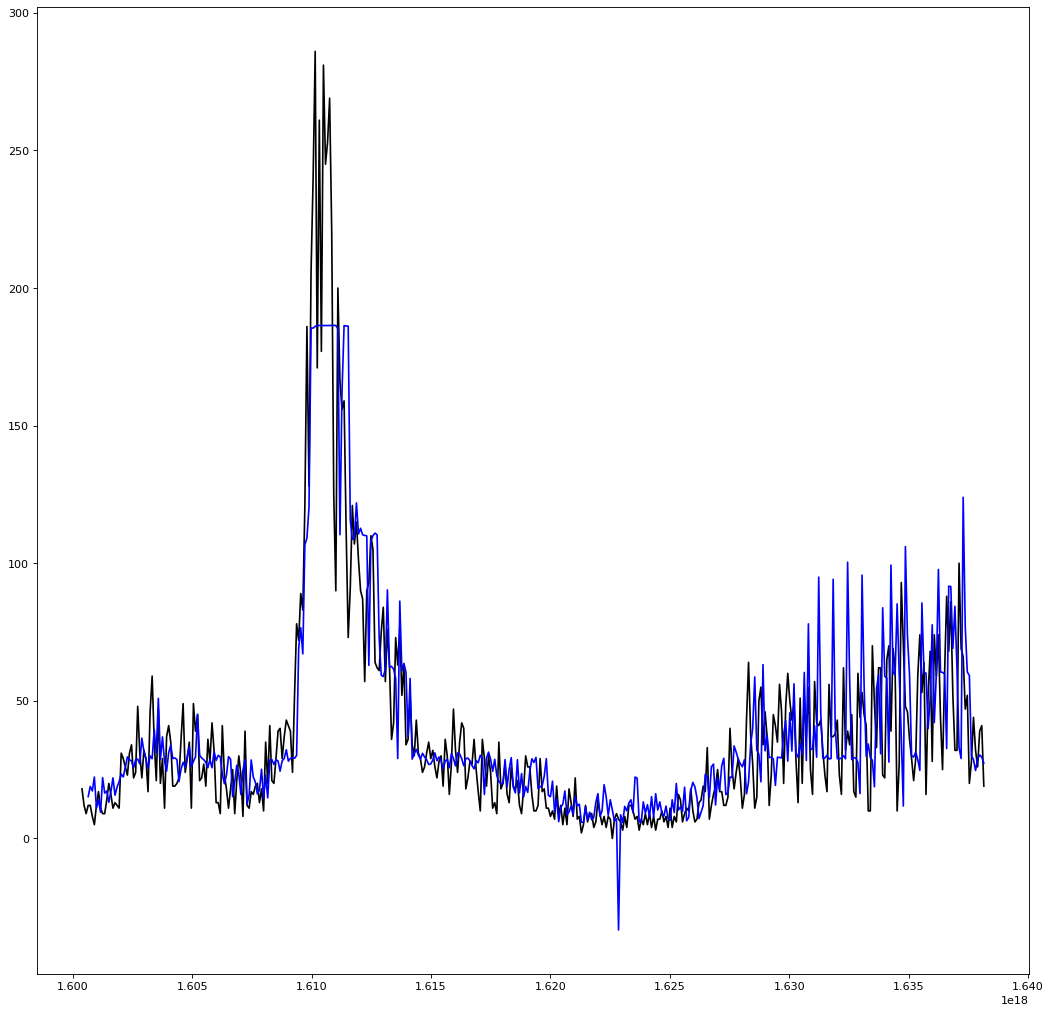

In [27]:
from matplotlib.pyplot import figure
y_pred = model3.predict(XX)
figsize=(figure(figsize=(16, 16), dpi=80))
plt.plot(t_full, og_ss, color='black')
plt.plot(tt, y_pred, color='blue')
plt.show()